In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
if not os.path.exists('dct.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/dct.py
if not os.path.exists('thinkplot.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkplot.py

# Упражнение 6.1

В главе 6 утверждается, что analyze1 требует времени пропорционально $n^3$, а analyze2 — пропорционально $n^2$.

Чтобы убедится в этом, необходимо их запустить с массивами разных размеров и засечь время работы.

In [ ]:
from thinkdsp import UncorrelatedGaussianNoise
signal = UncorrelatedGaussianNoise()
noise = signal.make_wave(duration=1.0, framerate=16384)
noise.ys.shape

(16384,)

In [ ]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
from thinkdsp import decorate
import numpy as np

loglog = dict(xscale='log', yscale='log')

def plot_bests(ns, bests):    
    plt.plot(ns, bests)
    decorate(**loglog)
    
    x = np.log(ns)
    y = np.log(bests)
    t = linregress(x,y)
    slope = t[0]

    return slope

In [ ]:
ns = 2 ** np.arange(10, 15)
ns

array([ 1024,  2048,  4096,  8192, 16384])

In [ ]:
import dct, thinkplot
results = []
for N in ns:
    print(N)
    ts = (0.5 + np.arange(N)) / N
    freqs = (0.5 + np.arange(N)) / 2
    ys = noise.ys[:N]
    result = %timeit -r1 -o dct.analyze1(ys, freqs, ts)
    results.append(result)
        
bests = [result.best for result in results]

1024
10 loops, best of 1: 98.2 ms per loop
2048
1 loop, best of 1: 700 ms per loop
4096
1 loop, best of 1: 4.04 s per loop
8192
1 loop, best of 1: 15.5 s per loop
16384
1 loop, best of 1: 1min 46s per loop


Если печатать зависимость времени работы от размера на логарифмической шкале, то получится прямая линия с уклоном 3 для
analyze1. Получилось немного меньше, что связано с отсутсвием возможности запустить с массивом большего размера из-за ограничений Colab.

2.462124637734757

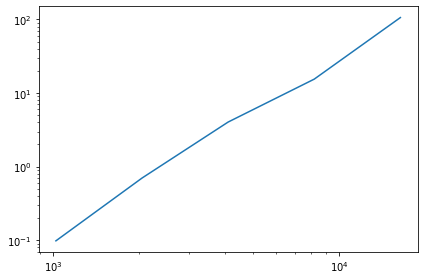

In [ ]:
plot_bests(ns, bests)

In [ ]:
results = []
for N in ns:
    print(N)
    ts = (0.5 + np.arange(N)) / N
    freqs = (0.5 + np.arange(N)) / 2
    ys = noise.ys[:N]
    result = %timeit -r1 -o dct.analyze2(ys, freqs, ts)
    results.append(result)
        
bests2 = [result.best for result in results]

1024
10 loops, best of 1: 46.5 ms per loop
2048
1 loop, best of 1: 160 ms per loop
4096
1 loop, best of 1: 472 ms per loop
8192
1 loop, best of 1: 1.75 s per loop
16384
1 loop, best of 1: 6.99 s per loop


Если печатать зависимость времени работы от размера на логарифмической шкале, то получится прямая линия с уклоном 2 для аnalyze2. Получилось немного меньше, что связано с отсутсвием возможности запустить с массивом большего размера из-за ограничений Colab.

1.7917687761673202

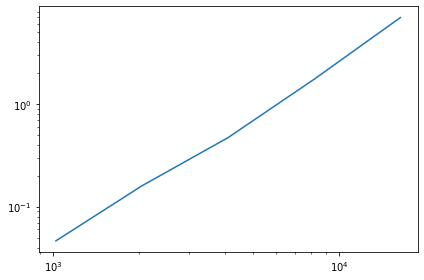

In [ ]:
plot_bests(ns, bests2)

Для scipy.fftpack.dct результаты получились ещё лучше.

In [ ]:
import scipy.fftpack

def scipy_dct(ys, freqs, ts):
    return scipy.fftpack.dct(ys, type=3)

In [ ]:
results = []
for N in ns:
    print(N)
    ts = (0.5 + np.arange(N)) / N
    freqs = (0.5 + np.arange(N)) / 2
    ys = noise.ys[:N]
    result = %timeit -r1 -o scipy_dct(ys, freqs, ts)
    results.append(result)
        
bests3 = [result.best for result in results]

1024
The slowest run took 10.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 13.8 µs per loop
2048
The slowest run took 41.08 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 1: 22.6 µs per loop
4096
10000 loops, best of 1: 42.9 µs per loop
8192
10000 loops, best of 1: 87.8 µs per loop
16384
10000 loops, best of 1: 181 µs per loop


0.9387306116028974

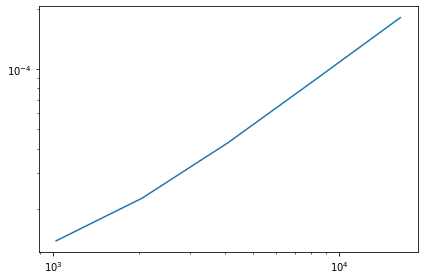

In [ ]:
plot_bests(ns, bests3)

# Упражнение 6.2

Одно из основных применений ДКП — это сжатие звука и изображений.

В простейшей форме ДКП при сжатии работает следующим
образом:
1. Разбивает длинный сигнал на сегменты.
2. Вычисляет ДКП каждого сегмента.
3. Определяет частотные компоненты с такой амплитудой, что их не слышно, и удаляет их, сохраняя только оставшиеся частоты и амплитуды.
4. При воспроизведении сигнала загружает частоты и амплитуды каждого сегмента и применяет обратное ДКП.

Данный алгоритм был реализован и применён для записи музыки.

In [ ]:
if not os.path.exists('rhapblue11924.wav'):
    !wget -O rhapblue11924.wav https://github.com/BozhkoAV/ThinkDSP/blob/master/code/rhapblue11924.wav?raw=true

--2022-05-21 17:16:06--  https://github.com/BozhkoAV/ThinkDSP/blob/master/code/rhapblue11924.wav?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BozhkoAV/ThinkDSP/raw/master/code/rhapblue11924.wav [following]
--2022-05-21 17:16:06--  https://github.com/BozhkoAV/ThinkDSP/raw/master/code/rhapblue11924.wav
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/rhapblue11924.wav [following]
--2022-05-21 17:16:06--  https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/rhapblue11924.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected

In [ ]:
from thinkdsp import read_wave
wave = read_wave('rhapblue11924.wav')
wave = wave.segment(start=0, duration=25)
wave.make_audio()

In [ ]:
segment = wave.segment(start=1.2, duration=0.5)
segment.normalize()
segment.make_audio()

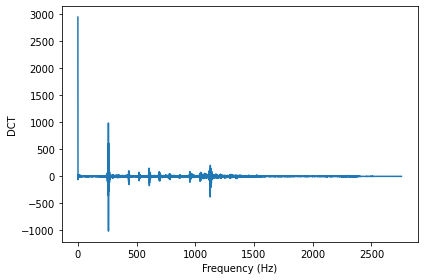

In [ ]:
seg_dct = segment.make_dct()
seg_dct.plot(high=4000)
decorate(xlabel='Frequency (Hz)', ylabel='DCT')

Есть только несколько гармоник со значительной амплитудой, в то время как аплитуды многих остальных близки к нулю.

Функция compress принимает значение DCT и устанавливает элементы, значения которых ниже порогового значения (thresh) в 0.

In [ ]:
def compress(dct, thresh=1):
    count = 0
    for i, amp in enumerate(dct.amps):
        if np.abs(amp) < thresh:
            dct.hs[i] = 0
            count += 1
            
    n = len(dct.amps)
    print(count, n, 100 * count / n, sep='\t')

Применив его к сегменту, мы смогли исключить более 90% элементов:

4483	5512	81.33164005805516


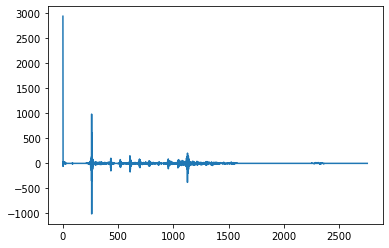

In [ ]:
seg_dct = segment.make_dct()
compress(seg_dct, thresh=10)
seg_dct.plot(high=4000)

При этом на слух сжатую версию не отличить от оригинальной.

In [ ]:
seg2 = seg_dct.make_wave()
seg2.make_audio()

Чтобы сжать более длинный сегмент, мы можем сделать DCT спектрограмму.

Функция make_dct_spectrogram аналогична wave.make_spectrogram, за исключением того, что она использует DCT.

In [ ]:
from thinkdsp import Spectrogram

def make_dct_spectrogram(wave, seg_length):
    window = np.hamming(seg_length)
    i, j = 0, seg_length
    step = seg_length // 2
    spec_map = {}

    while j < len(wave.ys):
        segment = wave.slice(i, j)
        segment.window(window)

        t = (segment.start + segment.end) / 2
        spec_map[t] = segment.make_dct()

        i += step
        j += step

    return Spectrogram(spec_map, seg_length)

In [ ]:
spectro = make_dct_spectrogram(wave, seg_length=1024)
for t, dct in sorted(spectro.spec_map.items()):
    compress(dct, thresh=0.2)

749	1024	73.14453125
803	1024	78.41796875
810	1024	79.1015625
901	1024	87.98828125
875	1024	85.44921875
822	1024	80.2734375
883	1024	86.23046875
866	1024	84.5703125
897	1024	87.59765625
918	1024	89.6484375
915	1024	89.35546875
882	1024	86.1328125
910	1024	88.8671875
915	1024	89.35546875
912	1024	89.0625
912	1024	89.0625
914	1024	89.2578125
897	1024	87.59765625
878	1024	85.7421875
840	1024	82.03125
880	1024	85.9375
903	1024	88.18359375
902	1024	88.0859375
897	1024	87.59765625
900	1024	87.890625
877	1024	85.64453125
923	1024	90.13671875
896	1024	87.5
829	1024	80.95703125
799	1024	78.02734375
821	1024	80.17578125
811	1024	79.19921875
809	1024	79.00390625
840	1024	82.03125
839	1024	81.93359375
810	1024	79.1015625
822	1024	80.2734375
785	1024	76.66015625
844	1024	82.421875
862	1024	84.1796875
850	1024	83.0078125
836	1024	81.640625
872	1024	85.15625
839	1024	81.93359375
766	1024	74.8046875
816	1024	79.6875
771	1024	75.29296875
825	1024	80.56640625
833	1024	81.34765625
846	1024	82.6171875
795

Для большинства сегментов степень сжатия составляет 60-75%.

Чтобы услышать, как это звучит, мы можем преобразовать спектрограмму обратно в wave и воспроизвести.

In [ ]:
wave2 = spectro.make_wave()
wave2.make_audio()

# Упражнение 6.3

Был воссоздан фрагмент из блокнота phase.ipynb, в котором исследуется влияние фазы на восприятие звука. Для собственного исследования был выбран другой сегмент звука.


In [ ]:
wave = read_wave('rhapblue11924.wav')
wave = wave.segment(start=1.9, duration=0.6)
wave.make_audio()

Функция plot_angle отображает угловую (angle, фаза) часть спектра.

In [ ]:
def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    plt.plot(spectrum.fs, angles, 'x')
    decorate(xlabel='Frequency (Hz)',  ylabel='Phase (radian)')

Функция plot_three отображает amplitudes, angles и waveform сигнала для заданного спектра.

In [ ]:
def plot_three(spectrum, thresh=1):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,3,1)
    spectrum.plot()
    plt.subplot(1,3,2)
    plot_angle(spectrum, thresh=thresh)
    plt.subplot(1,3,3)
    wave = spectrum.make_wave()
    wave.unbias()
    wave.normalize()
    wave.segment(duration=0.01).plot()
    display(wave.make_audio())

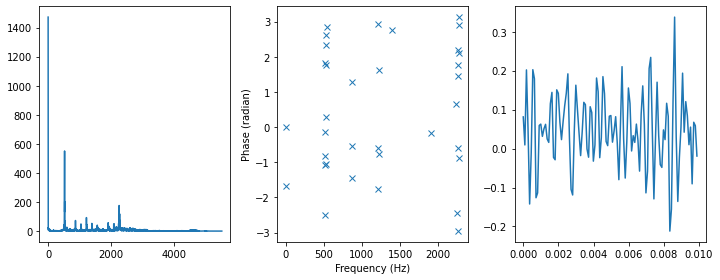

In [ ]:
spectrum = segment.make_spectrum()
plot_three(spectrum, thresh=50)

In [ ]:
def zero_angle(spectrum):
    res = spectrum.copy()
    res.hs = res.amps
    return res

При установке всех фаз в ноль:

Амплитуды не изменились, все фазы равны нулю, а waveform выглядит совсем по-другому, но тем не менее полученный звук похож на оригинальный.

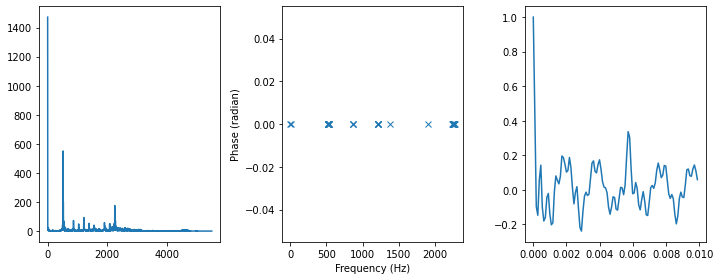

In [ ]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2, thresh=50)

In [ ]:
def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

Если мы умножим комплексые компоненты на $exp(i\phi)$, это приведет к эффекту от добавления $\phi$ к фазам: 

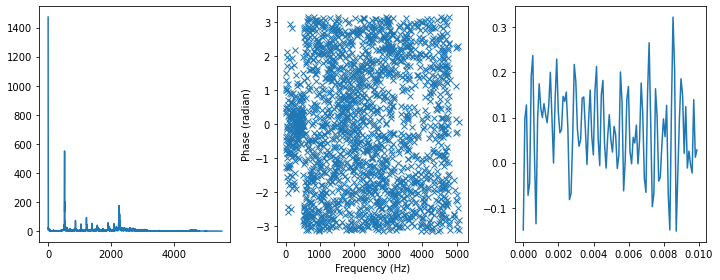

In [ ]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3)

waveform вновь сильно изменилась, но тем не менее полученный звук похож на оригинальный.

In [ ]:
PI2 = np.pi * 2

def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, PI2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

Последним рассматривается влияние от установки случайных значений для фаз:

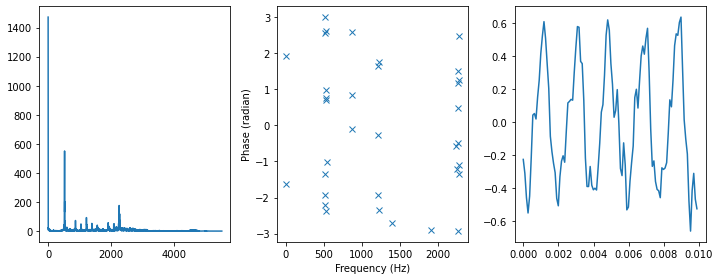

In [ ]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4, thresh=50)

Полученный звук в целом похож на оригинальный, но всё же отличие уже заметно.

В выводах указано, что:

1. Для звуков, которые имеют простую гармоническую структуру, кажется, что мы в основном мы безразличны к изменению фазы (phase blind), то есть мы не слышим изменений в фазовой структуре при условии, что гармоническая структура остается неизменной.

2. Возможным исключением являются звуки с низкой амплитудой на основной частоте. В этом случае мы могли бы использовать что-то похожее на автокорреляцию для восприятия высоты тона, и есть намеки на то, что этот анализ может быть более чувствительным к фазовой структуре.